# Определеяем съедобность грибов

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
training_mush = pd.read_csv('training_mush.csv')

In [4]:
X = training_mush.drop(['class'] , axis=1)
y = training_mush['class']

In [5]:
rf = RandomForestClassifier(random_state=0)

In [6]:
rf.fit(X, y)

C:\Users\Titan\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
parametrs = {'n_estimators' : range(10, 51, 10),
            'max_depth':range(1, 13, 2),
            'min_samples_leaf': range(1, 8, 1),
            'min_samples_split': range(2, 10, 2)}

In [8]:
grid_search_cv_rf = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1)

In [9]:
grid_search_cv_rf.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dep

In [10]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# Определяем важность фичей 

In [14]:
best_rf = grid_search_cv_rf.best_estimator_

In [15]:
feature_importances = best_rf.feature_importances_ # выражение IG для фичей

In [16]:
feature_importances = pd.DataFrame({'features': list(X), 
                                    'feature_importances': feature_importances})

In [18]:
feature_importances.sort_values('feature_importances', ascending=False) #максимальное снижение энтропии Sex_female

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [41]:
testing_mush = pd.read_csv('testing_mush.csv')

In [45]:
y_pred = grid_search_cv_rf.predict(testing_mush)

In [44]:
true_y = pd.read_csv('testing_y_mush.csv')

In [50]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true, y_pred)

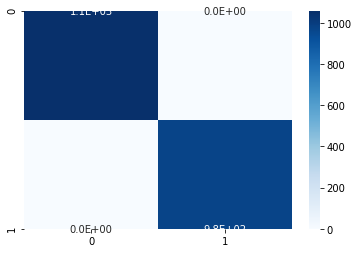

In [56]:
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='.1E')

In [57]:
conf_mat

array([[1055,    0],
       [   0,  976]], dtype=int64)

# Предсказание класса кораблей

In [71]:
invasion = pd.read_csv('invasion.csv')
factors = pd.factorize(invasion['class'])

(array([0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0,
        0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
        2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0,
        1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 

In [89]:
X = invasion.drop(['class'], axis=1)
y = factors[0]

In [68]:
operative_information = pd.read_csv('operative_information.csv')
operative_information

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [79]:
rf = RandomForestClassifier()

In [90]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
y_pred = rf.predict(operative_information)

In [96]:
pd.Series(y_pred).value_counts()

1    675
0    595
2    230
dtype: int64

In [98]:
feature_importances = rf.feature_importances_ # выражение IG для фичей

In [99]:
feature_importances = pd.DataFrame({'features': list(X), 
                                    'feature_importances': feature_importances})

In [100]:
feature_importances.sort_values('feature_importances', ascending=False) #максимальное снижение энтропии Sex_female

,features,feature_importances
3,brightness,0.389010
5,volume,0.227657
2,speed,0.184017
1,i_reflection,0.114564
0,g_reflection,0.084106
4,time_of_observance,0.000646


# Предсказание опасного участка космоса

In [105]:
space_can_be_a_dangerous_place = pd.read_csv('space_can_be_a_dangerous_place.csv')
X = space_can_be_a_dangerous_place.drop(['dangerous'], axis=1)
y = space_can_be_a_dangerous_place.dangerous

In [106]:
space_can_be_a_dangerous_place.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
